# Model

## 1. Import Libraries and Utilities

In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
!pip install minisom

In [2]:
from EDA.age import calc_age
from EDA.educ import education
from EDA.data_load import data_load

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\Data\\Customer Info Dataset.csv')

In [4]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

In [5]:
num_cust_info = cust_info.loc[:,(cust_info.dtypes != 'object') == True]
num_cust_info = num_cust_info.drop([ 'loyalty_card_number', 'latitude', 'longitude'], axis=1)
num_cust_info

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction
customer_id,,,,,,,,,,,,,,,,,
4239,0.0,0.0,0.0,2.0,91.0,20.0,22.0,22.0,195.0,964.0,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0
19330,1.0,0.0,0.0,2.0,197.0,5958.0,21.0,20.0,1435.0,434.0,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0
2272,1.0,1.0,0.0,20.0,397.0,20.0,9.0,310.0,379.0,222.0,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0
25288,3.0,4.0,1.0,2.0,5282.0,237.0,12.0,499.0,873.0,460.0,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0
12829,0.0,0.0,0.0,2.0,82.0,22.0,21.0,9.0,172.0,856.0,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.0,0.0,1.0,2.0,209.0,5474.0,20.0,18.0,1435.0,521.0,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0
26447,0.0,0.0,0.0,3.0,185.0,1066.0,15.0,267.0,276.0,287.0,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0
182,0.0,0.0,0.0,2.0,83.0,23.0,23.0,23.0,189.0,921.0,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0


## 3. Data Scaling and Normalization

In [6]:
import numpy as np

# check if there are any infinite values
print(np.isinf(num_cust_info).any())

# check if there are any missing values
print(np.isnan(num_cust_info).any())


kids_home                                  False
teens_home                                 False
number_complaints                          False
distinct_stores_visited                    False
lifetime_spend_groceries                   False
lifetime_spend_electronics                 False
typical_hour                                True
lifetime_spend_vegetables                  False
lifetime_spend_nonalcohol_drinks           False
lifetime_spend_alcohol_drinks              False
lifetime_spend_meat                        False
lifetime_spend_fish                        False
lifetime_spend_hygiene                     False
lifetime_spend_videogames                   True
lifetime_total_distinct_products           False
percentage_of_products_bought_promotion    False
year_first_transaction                     False
dtype: bool
kids_home                                  False
teens_home                                 False
number_complaints                          False
distinct

# ATENÇÃO AS VARIAVEIS TYPICAL_HOUR E LIFETIME_SPEND_VIDEOGAMES

In [7]:
num_cust_info = num_cust_info.drop(['typical_hour', 'lifetime_spend_videogames'], axis = 1)

In [8]:
scaler = StandardScaler()
# Here, we are using fit_transform, by fitting and
# immediately transforming the data into the scaled values
scaled_data = scaler.fit_transform(num_cust_info)

## 4. K-Means

In [16]:
dispersion = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    dispersion.append(kmeans.inertia_)

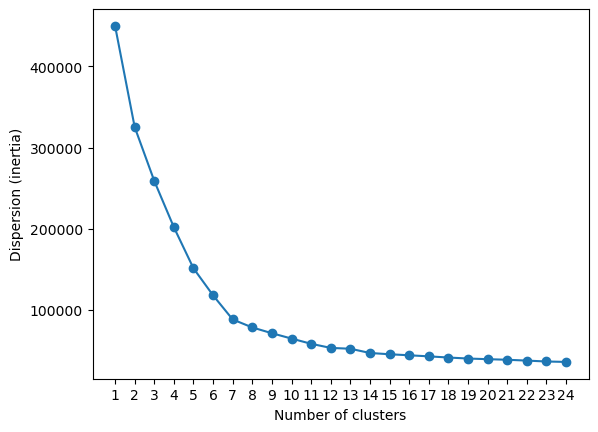

In [18]:
plt.plot(range(1, 25), dispersion, marker='o')
plt.xticks(range(1, 25))
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(scaled_data)
num_cust_info['cluster_kmeans'] = kmeans.predict(scaled_data)

In [26]:
num_cust_info.groupby(['cluster_kmeans']).mean()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction
cluster_kmeans,,,,,,,,,,,,,,,
0,0.689588,0.068547,0.500000,1.992625,200.406291,4999.557484,20.033623,1500.946855,499.866161,57.739913,58.946421,49.912148,99.785249,0.100002,2009.978091
1,3.091242,1.819238,0.934151,3.007532,4997.505272,200.015279,602.079191,900.760275,500.780934,1100.657629,1101.408651,501.244889,2001.605982,0.200114,2009.945341
2,0.995973,0.074305,1.070077,19.829642,301.944623,19.911800,298.419251,298.610954,200.577124,150.176802,148.594845,50.025373,495.954893,0.497250,2010.013492
3,1.160525,0.771495,0.310885,2.000212,997.551461,50.036637,1499.739094,20.005294,20.117535,0.000000,0.000000,100.033037,199.708598,0.049988,2010.014824
4,0.997692,0.271507,1.550776,7.997482,14989.130718,199.977549,799.505245,900.759337,599.122954,1500.893621,1498.612044,200.087285,4010.636802,0.149976,2000.007344
5,0.000000,0.000000,0.000000,1.000000,2.701444,1.149498,2.124160,2.302082,2.704784,2.615967,34997.747788,1.553669,0.977930,0.200151,2010.030973
6,0.276431,0.216395,0.348342,2.342075,2896.758206,608.811644,274.019132,311.133102,462.103249,352.265545,352.097641,107.307768,236.565067,0.144003,2011.378525


In [27]:
num_cust_info.mean()

kids_home                                     1.146700
teens_home                                    0.512933
number_complaints                             0.764367
distinct_stores_visited                       6.120767
lifetime_spend_groceries                   3978.634251
lifetime_spend_electronics                  965.238793
lifetime_spend_vegetables                   564.207835
lifetime_spend_nonalcohol_drinks            628.750142
lifetime_spend_alcohol_drinks               379.344543
lifetime_spend_meat                         513.878374
lifetime_spend_fish                         777.151833
lifetime_spend_hygiene                      162.824538
lifetime_total_distinct_products           1123.887300
percentage_of_products_bought_promotion       0.190981
year_first_transaction                     2008.684067
cluster_kmeans                                2.843900
dtype: float64

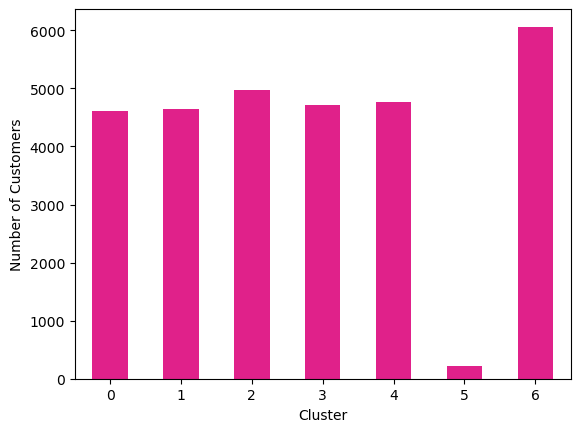

In [34]:
# Create a bar chart of the number of customers in each cluster
num_cust_info.groupby(['cluster_kmeans']).size().plot(kind='bar', color='#e0218a')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
# Show the plot
plt.show()

## 5. Hierarchical Clustering

## 6. Self Organizing Maps

## 7. DBSCAN

## 8. Mean Shift